In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# core libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics, tree
from IPython.display import display

# feature engineering / dataset tools
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, normalize
from scipy.signal import savgol_filter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# metrics
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
%matplotlib inline

In [ ]:
# load data set
train = pd.read_csv('gdrive/MyDrive/COMP562_Final_Project/exoTrain.csv')
test = pd.read_csv('gdrive/MyDrive/COMP562_Final_Project/exoTest.csv')


In [ ]:
# visualize samples

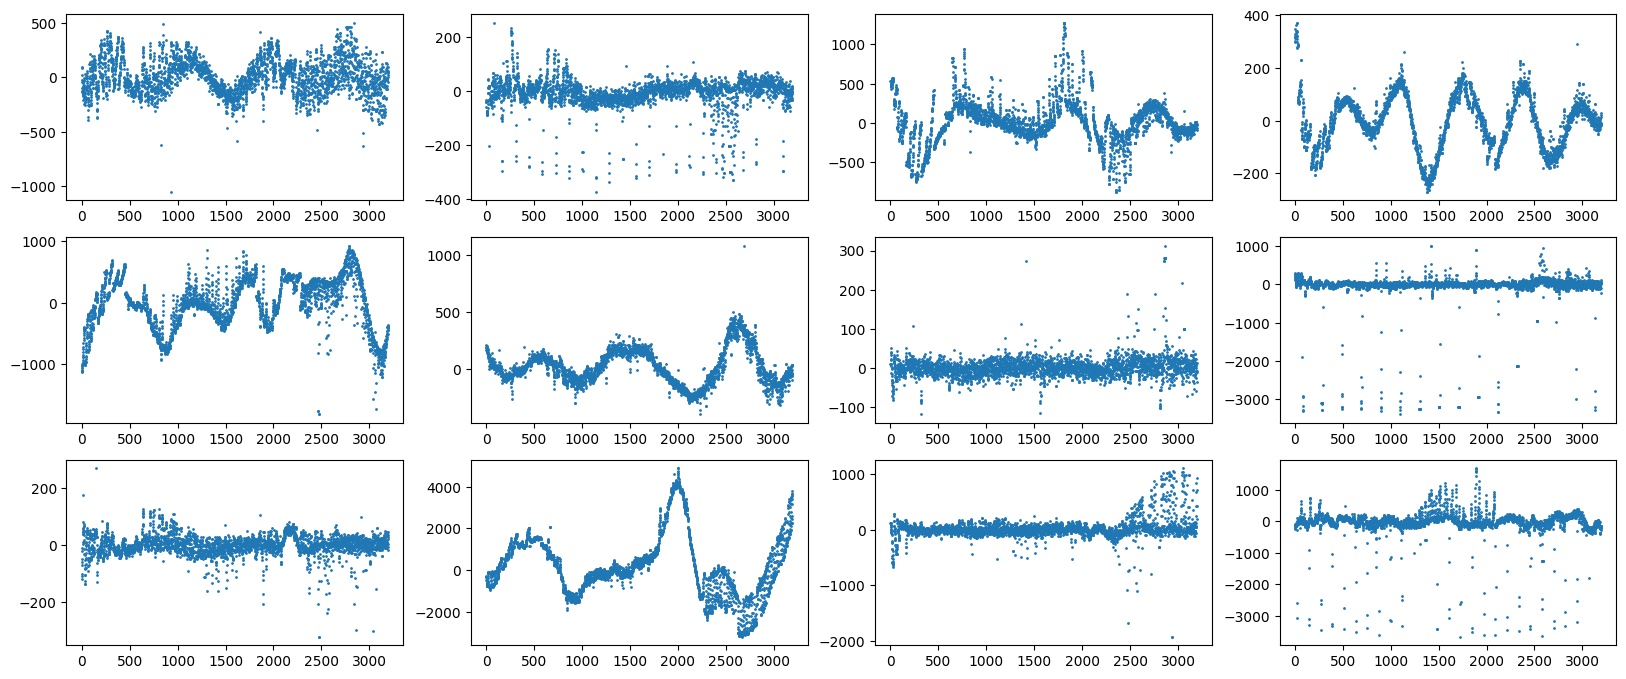

In [ ]:
fig_width = 20
fig_height = 40

fig = plt.figure(figsize=(fig_width, fig_height))
for i in range(12):
    ax = fig.add_subplot(14, 4, i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 2].iloc[i,1:],s=1)

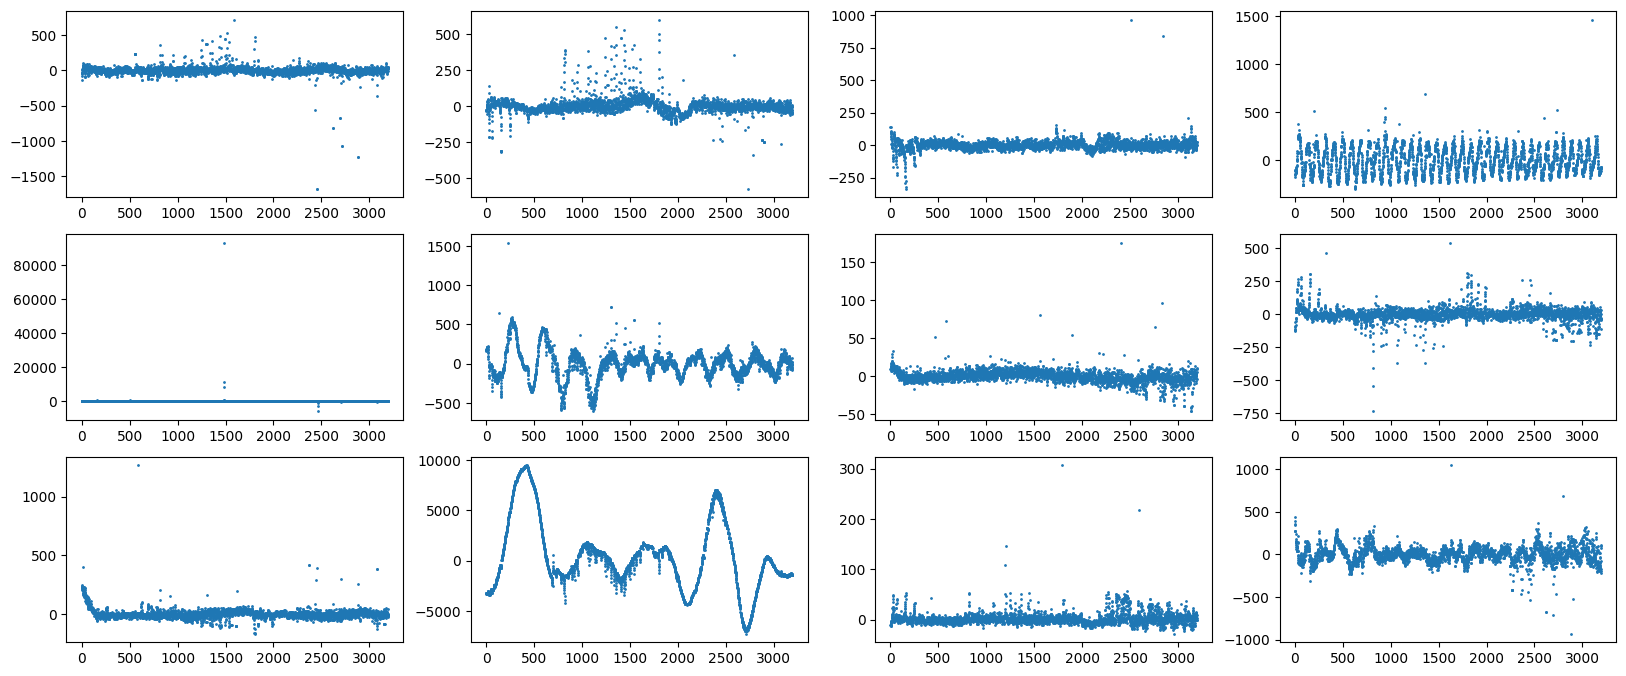

In [ ]:
fig = plt.figure(figsize=(fig_width, fig_height))
for i in range(12):
    ax = fig.add_subplot(14, 4, i+1)
    ax.scatter(np.arange(3197),train[train['LABEL'] == 1].iloc[i,1:],s=1)

In [ ]:
# model evaluation functions

In [ ]:
def logistic(train_X,train_y,test_X,test_y):
    # make and train model, get predictions
    lgr = LogisticRegression(max_iter=1000)
    lgr.fit(train_X,train_y)
    predictions = lgr.predict(test_X)
    # record metrics
    f1 = metrics.f1_score(test_y, predictions,pos_label=2)
    accuracy = accuracy_score(test_y, predictions)
    # make confusion matrix display
    cm = confusion_matrix(test_y, predictions, labels=[1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-planet", "planet"])
    # display confusion matrix
    disp.plot()
    disp.ax_.set_title('Model: Logistic Regression Classifier' + '\nF1 Minority Score: ' + str(f1) + '\nAccuracy: ' + str(accuracy))
    plt.show()
    return f1

In [ ]:
def linearSVC(train_X,train_y,test_X,test_y):
    # make and train model, get predictions
    svm=LinearSVC()
    svm.fit(train_X,train_y)
    predictions = svm.predict(test_X)
    # record metrics
    f1 = metrics.f1_score(test_y, predictions,pos_label=2)
    accuracy = accuracy_score(test_y, predictions)
    # make confusion matrix display
    cm = confusion_matrix(test_y, predictions, labels=[1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-planet", "planet"])
    # display confusion matrix
    disp.plot()
    disp.ax_.set_title('Model: Linear Support Vector Classifier' + '\nF1 Minority Score: ' + str(f1) + '\nAccuracy: ' + str(accuracy))
    plt.show()
    return f1

In [ ]:
def randomForest(train_X,train_y,test_X,test_y):
    # make and train model, get predictions
    rnd = RandomForestClassifier()
    rnd.fit(train_X, train_y)
    predictions = rnd.predict(test_X)
    # record metrics
    f1 = metrics.f1_score(test_y, predictions,pos_label=2)
    accuracy = accuracy_score(test_y, predictions)
    # make confusion matrix display
    cm = confusion_matrix(test_y, predictions, labels=[1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-planet", "planet"])
    # display confusion matrix
    disp.plot()
    disp.ax_.set_title('Model: Random Forest Classifier' + '\nF1 Minority Score: ' + str(f1) + '\nAccuracy: ' + str(accuracy))
    plt.show()
    return f1


In [ ]:
def naiveBayes(train_X,train_y,test_X,test_y):
    # make and train model, get predictions
    gnb = GaussianNB()
    gnb.fit(train_X, train_y)
    predictions = gnb.predict(test_X)
    # record metrics
    f1 = metrics.f1_score(test_y, predictions,pos_label=2)
    accuracy = accuracy_score(test_y, predictions)
    # make confusion matrix display
    cm = confusion_matrix(test_y, predictions, labels=[1,2])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["non-planet", "planet"])
    # display confusion matrix
    disp.plot()
    disp.ax_.set_title('Model: Guassian Naive Bayes Classifier' + '\nF1 Minority Score: ' + str(f1) + '\nAccuracy: ' + str(accuracy))
    plt.show()
    return f1

In [ ]:
# a function to reset the data set, splitting it into train/test features/labels
def reset(train,test):
    train_X = train.drop('LABEL', axis=1)
    train_y = train['LABEL'].values
    test_X = test.drop('LABEL', axis=1)
    test_y = test['LABEL'].values
    return train_X,train_y,test_X,test_y

In [ ]:
train_X,train_y,test_X,test_y = reset(train,test)
f1_scores =  []
f1_scores.append(logistic(train_X,train_y,test_X,test_y))
f1_scores.append(linearSVC(train_X,train_y,test_X,test_y))
f1_scores.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_scores.append(randomForest(train_X,train_y,test_X,test_y))
f1_scores

In [ ]:
# feature engineering functions

In [ ]:
def robust(df1,df2):
    scaler = RobustScaler()
    train_X = scaler.fit_transform(df1)
    test_X = scaler.transform(df2)
    return train_X,test_X

In [ ]:
def norm(df1,df2):
    train_X = normalize(df1)
    test_X = normalize(df2)
    return train_X,test_X

In [ ]:
def fourier(df1,df2):
    train_X = np.abs(np.fft.fft(df1, axis=1))
    test_X = np.abs(np.fft.fft(df2, axis=1))
    return train_X,test_X

In [ ]:
def savgol(df1,df2):
    x = savgol_filter(df1,21,4,deriv=0)
    y = savgol_filter(df2,21,4,deriv=0)
    return x,y

In [ ]:
def smote(a,b):
    model = SMOTE()
    X,y = model.fit_resample(a, b)
    return X,y

In [ ]:
# visualize feature engineering

In [ ]:
train_X,train_y,test_X,test_y = reset(train,test)
fourier_X,_ = fourier(train_X,test_X)
savgol_X,_ = savgol(fourier_X,_)
norm_X,_ = norm(savgol_X,_)
robust_X,_ = robust(norm_X,_)

visualize_indices = [2,4,99,100]

x = np.array(range(3197))
fig = plt.figure(figsize=(24,500))

for i in range(0, len(visualize_indices)):
  sub_plot = fig.add_subplot(100,5,5*i+1)
  title_string = 'index: ' + str(visualize_indices[i]) + ', raw data, '
  title_string += 'exoplanet' if train_y[visualize_indices[i]] == 2 else 'non-exoplanet'
  sub_plot.set_title(title_string)
  sub_plot.scatter(x,train_X.iloc[visualize_indices[i],:],s=1)

  sub_plot = fig.add_subplot(100,5,5*i+2)
  title_string = 'index: ' + str(visualize_indices[i]) + ', fourier transform, '
  title_string += 'exoplanet' if train_y[visualize_indices[i]] == 2 else 'non-exoplanet'
  sub_plot.set_title(title_string)
  sub_plot.scatter(x,fourier_X[visualize_indices[i],:],s=1)
  
  sub_plot = fig.add_subplot(100,5,5*i+3)
  title_string = 'index: ' + str(visualize_indices[i]) + ', savgol filter, '
  title_string += 'exoplanet' if train_y[visualize_indices[i]] == 2 else 'non-exoplanet' 
  sub_plot.set_title(title_string)
  sub_plot.scatter(x,savgol_X[visualize_indices[i],:],s=1)

  sub_plot = fig.add_subplot(100,5,5*i+4)
  title_string = 'index: ' + str(visualize_indices[i]) + ', normalized, '
  title_string += 'exoplanet' if train_y[visualize_indices[i]] == 2 else 'non-exoplanet'
  sub_plot.set_title(title_string)
  sub_plot.scatter(x,norm_X[visualize_indices[i],:],s=1)

  sub_plot = fig.add_subplot(100,5,5*i+5)
  title_string = 'index: ' + str(visualize_indices[i]) + ', robust scaler, '
  title_string += 'exoplanet' if train_y[visualize_indices[i]] == 2 else 'non-exoplanet'
  sub_plot.set_title(title_string)
  sub_plot.scatter(x,robust_X[visualize_indices[i],:],s=1)


In [ ]:
# re-run models with engineered features

In [ ]:
train_X,train_y,test_X,test_y = reset(train,test)
train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

f1_scores =  []
f1_scores.append(logistic(train_X,train_y,test_X,test_y))
f1_scores.append(linearSVC(train_X,train_y,test_X,test_y))
f1_scores.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_scores.append(randomForest(train_X,train_y,test_X,test_y))
f1_scores

In [ ]:
# Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
# reset data
train_X,train_y,test_X,test_y = reset(train,test)

# apply feature engineering
train_X,test_X = fourier(train_X,test_X)
train_X,test_X = savgol(train_X,test_X)
train_X,test_X = norm(train_X,test_X)
train_X,test_X = robust(train_X,test_X)

# apply SMOTE
train_X,train_y = smote(train_X,train_y)
train_X, X, train_y, y = train_test_split(train_X, train_y, test_size=0.3)
test_X = np.concatenate((test_X, X), axis=0)
test_y = np.concatenate((test_y, y), axis=0)

# re-run models with engineered, reblanced dataset
f1_scores =  []
f1_scores.append(logistic(train_X,train_y,test_X,test_y))
f1_scores.append(linearSVC(train_X,train_y,test_X,test_y))
f1_scores.append(naiveBayes(train_X,train_y,test_X,test_y))
f1_scores.append(randomForest(train_X,train_y,test_X,test_y))
f1_scores